In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr

In [2]:
def rargmax(vector):    # https://gist.github.com/stober/1943451
    """ Argmax that chooses randomly among eligible maximum idices. """
    m = np.amax(vector)
    indices = np.nonzero(vector == m)[0]
    return pr.choice(indices)

register(
    id='FrozenLake-v3',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '4x4', 'is_slippery': False}
)
env = gym.make('FrozenLake-v3')

Success rate: 0.9035
Final Q-Table Values
LEFT DOWN RIGHT UP
[[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]


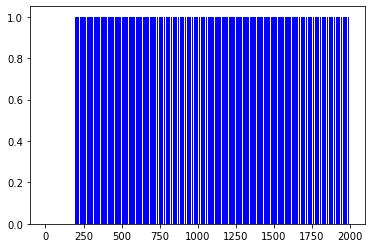

In [3]:
# Initialize table with all zeros
# observation_space.n : 16, action_space.n : 4
Q = np.zeros([env.observation_space.n, env.action_space.n])

# Set learning parameters
num_episodes = 2000

# create lists to contain total rewards and steps per episode
rList = []

for i in range(num_episodes):
    # Reset environment and get first new observation
    state = env.reset()
    rAll = 0
    done = False

    # The Q-Table learning algorithm
    while not done:
        action = rargmax(Q[state, :])

        # Get new state and reward from environment
        new_state, reward, done, _ = env.step(action)

        # Update Q-Table with new knowledge using learning rate
        Q[state, action] = reward + np.max(Q[new_state, :])

        rAll += reward
        state = new_state
    rList.append(rAll)

print("Success rate: " + str(sum(rList) / num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)

plt.bar(range(len(rList)), rList, color="blue")
#plt.bar(range(len(rList)), rList, color='b', alpha=0.4)
plt.show()